In [3]:
import matplotlib.pyplot as plt
import json

In [4]:
bert_CT23 = json.load(open("../models/checkworthiness/CT23/bert-base-cased/checkpoint-10560/trainer_state.json"))
roberta_CT23 = json.load(open("../models/checkworthiness/CT23/roberta-base/checkpoint-10560/trainer_state.json"))

bert_CT21 = json.load(open("../models/checkworthiness/CT21/bert-base-cased/checkpoint-520/trainer_state.json"))
roberta_CT21 = json.load(open("../models/checkworthiness/CT21/roberta-base/checkpoint-520/trainer_state.json"))

bert_fever = json.load(open("../models/verification/fever/bert-base-cased/checkpoint-37500/trainer_state.json"))
roberta_fever = json.load(open("../models/verification/fever/roberta-base/checkpoint-37500/trainer_state.json"))

# CT23

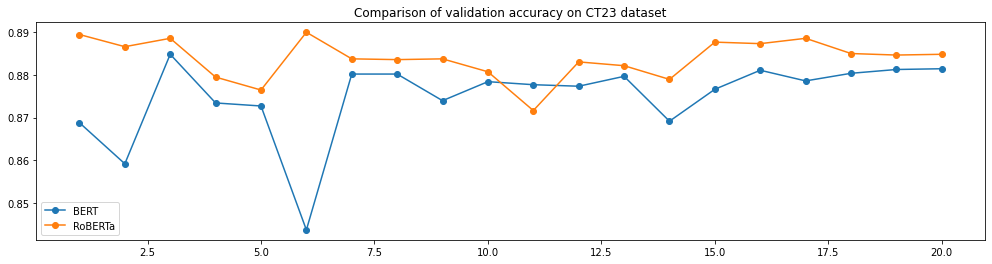

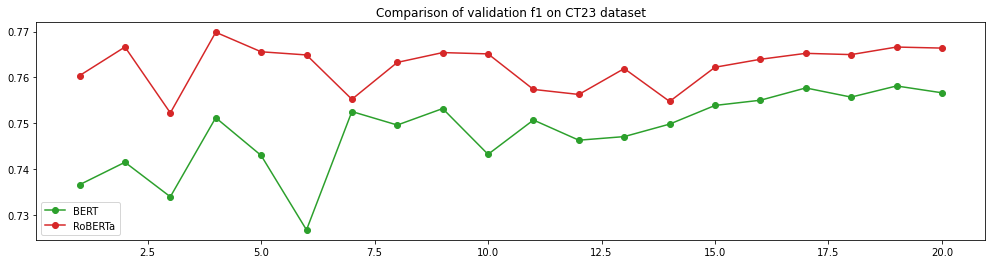

In [5]:
val_bert_CT23 = [i for i in bert_CT23["log_history"] if "eval_accuracy" in i.keys()]
val_roberta_CT23 = [i for i in roberta_CT23["log_history"] if "eval_accuracy" in i.keys()]

def plot_metric(bert, roberta, metric, dataset_name="CT23", c_bert="C0", c_roberta="C1"):
    plt.figure(figsize=(17, 4))
    plt.plot(list(range(1, 21)), [i[f"eval_{metric}"] for i in bert], '-o', c=c_bert, label="BERT")
    if roberta is not None:
        plt.plot(list(range(1, 21)), [i[f"eval_{metric}"] for i in roberta], '-o', c=c_roberta, label="RoBERTa")
    plt.title(f"Comparison of validation {metric} on {dataset_name} dataset")
    plt.savefig(f"../figures/{dataset_name}/{metric}_{dataset_name}.png")
    plt.legend()
    plt.show()
    
plot_metric(val_bert_CT23, val_roberta_CT23, "accuracy")
plot_metric(val_bert_CT23, val_roberta_CT23, "f1", c_bert="C2", c_roberta="C3")

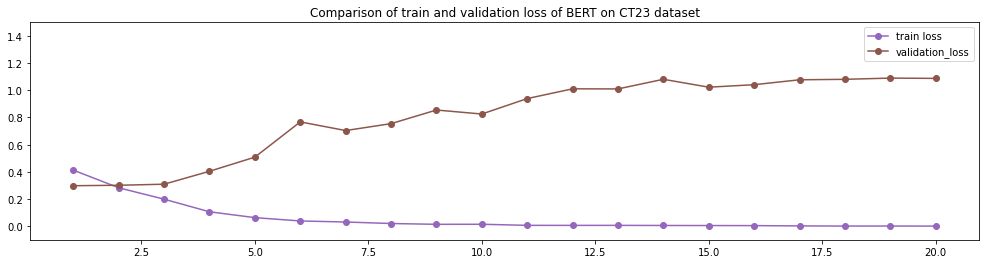

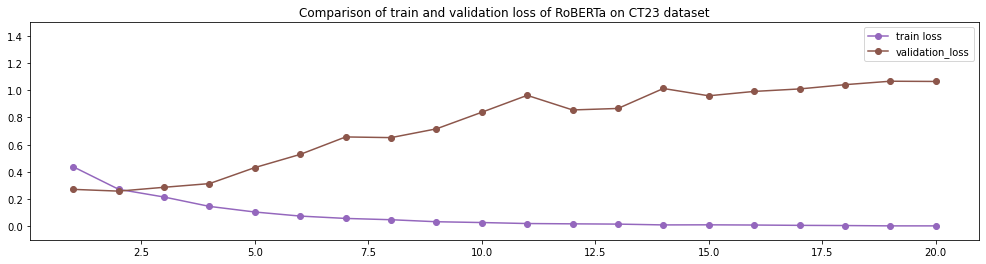

In [6]:
def plot_loss_for_model(model, model_name, dataset_name="CT23", c_train="C4", c_val="C5", y_lim=(-0.1, 1.5)):
    plt.figure(figsize=(17, 4))
    train = [i for i in model["log_history"] if "eval_accuracy" not in i.keys()]
    validation = [i for i in model["log_history"] if "eval_accuracy" in i.keys()]
    plt.plot(list(range(1, 21)), [i["loss"] for i in train], "-o", c=c_train, label="train loss")
    plt.plot(list(range(1, 21)), [i["eval_loss"] for i in validation], "-o", c=c_val, label="validation_loss")
    plt.title(f"Comparison of train and validation loss of {model_name} on {dataset_name} dataset")
    plt.ylim(y_lim)
    plt.savefig(f"../figures/{dataset_name}/{model_name}_{dataset_name}_loss.png")
    plt.legend()
    plt.show()
    
plot_loss_for_model(bert_CT23, "BERT", "CT23")
plot_loss_for_model(roberta_CT23, "RoBERTa", "CT23")

# CT21

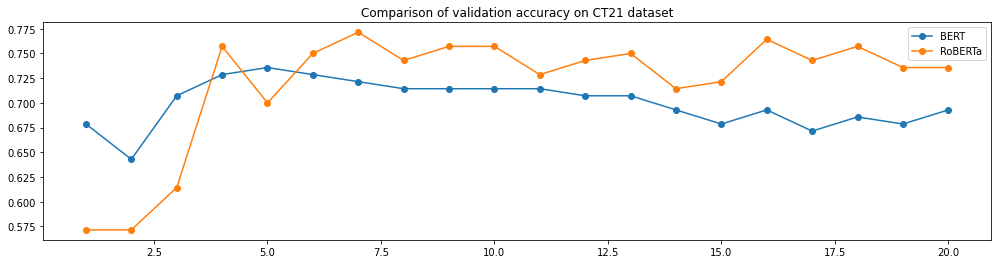

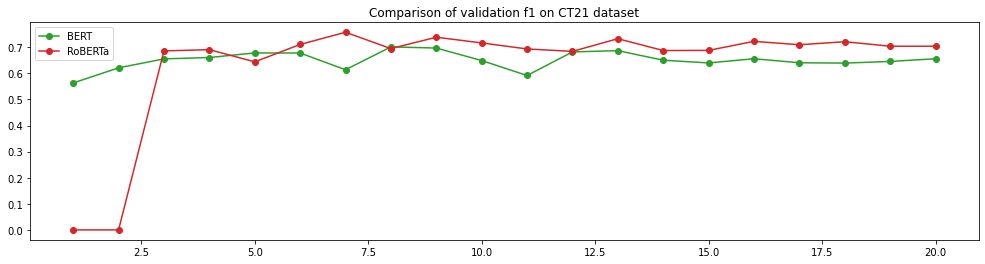

In [7]:
val_bert_CT21 = [i for i in bert_CT21["log_history"] if "eval_accuracy" in i.keys()]
val_roberta_CT21 = [i for i in roberta_CT21["log_history"] if "eval_accuracy" in i.keys()]

plot_metric(val_bert_CT21, val_roberta_CT21, "accuracy", dataset_name="CT21", )
plot_metric(val_bert_CT21, val_roberta_CT21, "f1", dataset_name="CT21", c_bert="C2", c_roberta="C3")

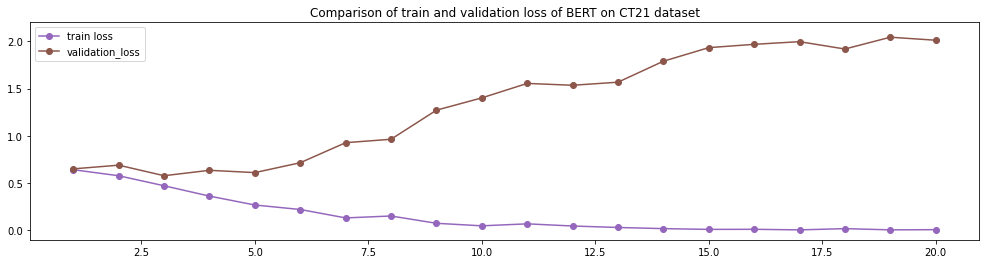

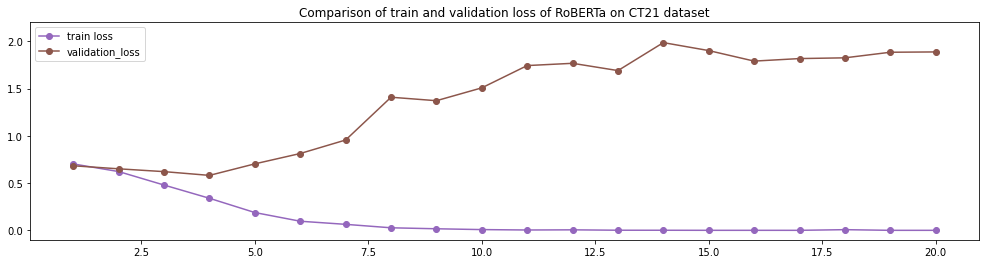

In [8]:
plot_loss_for_model(bert_CT21, "BERT", "CT21", y_lim=(-0.1, 2.2))
plot_loss_for_model(roberta_CT21, "RoBERTa", "CT21", y_lim=(-0.1, 2.2))

## FEVER

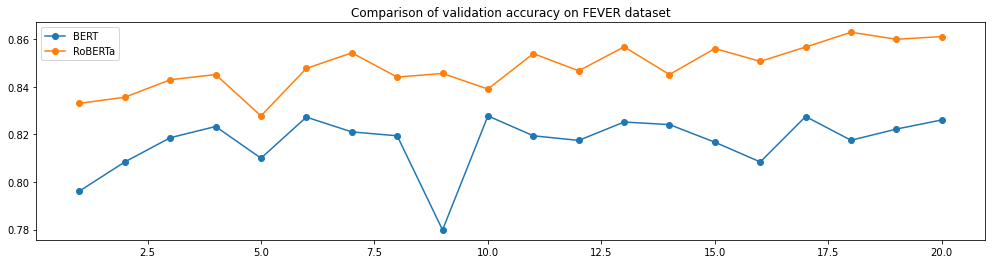

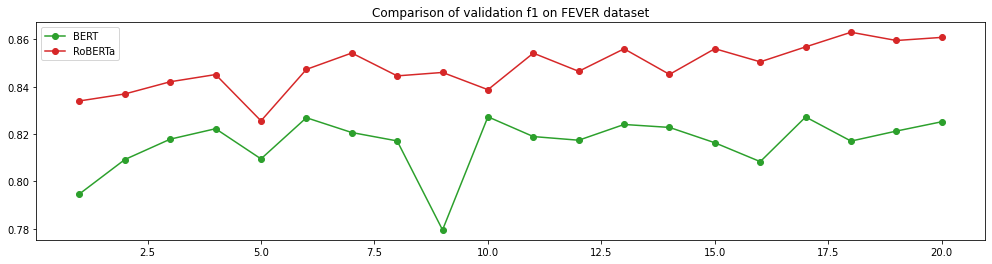

In [9]:
val_bert_fever = [i for i in bert_fever["log_history"] if "eval_accuracy" in i.keys()]
val_roberta_fever = [i for i in roberta_fever["log_history"] if "eval_accuracy" in i.keys()]

plot_metric(val_bert_fever, val_roberta_fever, "accuracy", dataset_name="FEVER")
plot_metric(val_bert_fever, val_roberta_fever, "f1", dataset_name="FEVER", c_bert="C2", c_roberta="C3")

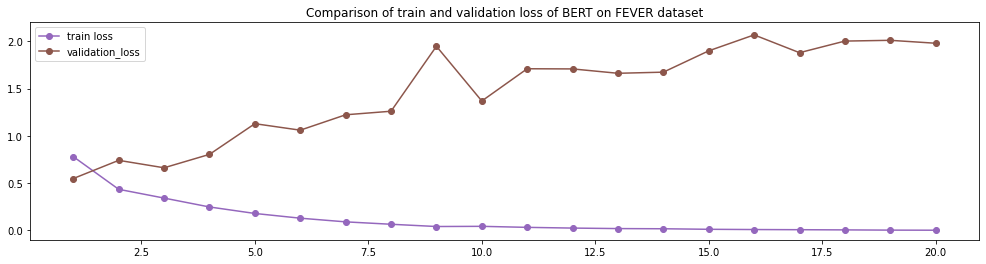

In [10]:
plot_loss_for_model(bert_fever, "BERT", "FEVER", y_lim=(-0.1, 2.2))

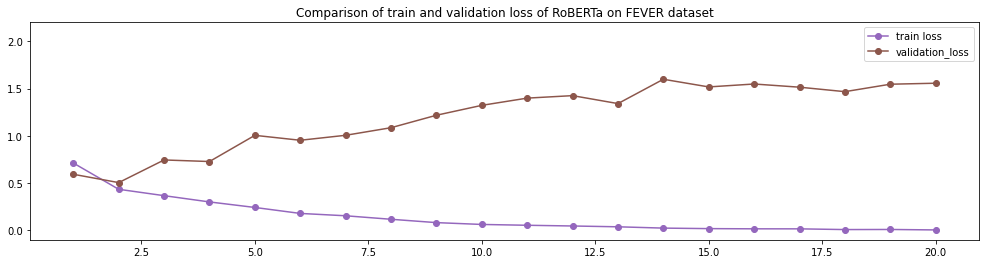

In [11]:
plot_loss_for_model(roberta_fever, "RoBERTa", "FEVER", y_lim=(-0.1, 2.2))